# 07_2.Own-Way ANOVA(연습문제1)
- https://pingouin-stats.org/build/html/generated/pingouin.anova.html#pingouin.anova

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기(github)

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [3]:
# 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)
owa_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/07_2.OWA(4).csv', encoding="cp949")
owa_df.head()

,매장,만족도1,만족도2
0,2,85,85
1,2,82,82
2,3,86,90
3,2,88,88
4,1,93,93


### 2.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [4]:
owa_df['매장'].replace({1:'강남', 2:'강동', 3:'강서', 4:'강북'}, inplace=True)
owa_df['매장'] = owa_df['매장'].astype('category')

owa_df.head()

,매장,만족도1,만족도2
0,강동,85,85
1,강동,82,82
2,강서,86,90
3,강동,88,88
4,강남,93,93


### 2.3 자료구조 살펴보기

In [5]:
owa_df.shape

(200, 3)

In [6]:
owa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   매장      200 non-null    category
 1   만족도1    200 non-null    int64   
 2   만족도2    200 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 3.6 KB


In [7]:
owa_df.columns

Index(['매장', '만족도1', '만족도2'], dtype='object')

## 3.기술통계

In [8]:
# 그룹별 기술통계
owa_df.groupby('매장')["만족도1"].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
매장,,,,,,,,
강남,50.0,89.56,5.610,78.0,86.0,89.0,94.00,99.0
강동,50.0,88.22,5.396,75.0,85.0,88.5,92.00,99.0
강북,50.0,87.20,4.233,79.0,84.0,87.0,90.75,96.0
강서,50.0,84.06,4.770,74.0,81.0,84.0,86.75,94.0


In [10]:
# 분석변수가 여러개 일 때
num_feature = ['만족도1', '만족도2']
for num in num_feature:
    print("----", num, "----")
    results = owa_df.groupby('매장')[num].describe().round(3)
    print(results, "\n")

---- 만족도1 ----
    count   mean    std   min   25%   50%    75%   max
매장                                                    
강남   50.0  89.56  5.610  78.0  86.0  89.0  94.00  99.0
강동   50.0  88.22  5.396  75.0  85.0  88.5  92.00  99.0
강북   50.0  87.20  4.233  79.0  84.0  87.0  90.75  96.0
강서   50.0  84.06  4.770  74.0  81.0  84.0  86.75  94.0 

---- 만족도2 ----
    count   mean    std   min   25%   50%    75%   max
매장                                                    
강남   50.0  89.56  5.610  78.0  86.0  89.0  94.00  99.0
강동   50.0  88.22  5.396  75.0  85.0  88.5  92.00  99.0
강북   50.0  87.14  4.005  79.0  85.0  87.0  89.00  96.0
강서   50.0  88.06  4.770  78.0  85.0  88.0  90.75  98.0 



## 4.ANOVA


In [16]:
# 등분산일때
pg.anova(dv = '만족도1',
         between = '매장',
         data = owa_df,
         detailed = True).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,매장,822.76,3,274.253,10.834,0.0,0.142
1,Within,4961.72,196,25.315,NaN,NaN,NaN


In [17]:
# post-hoc test: LSD
pg.pairwise_tests(data = owa_df,
                   dv = '만족도1',
                   between = '매장').round(3)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,매장,강동,강서,False,True,4.085,98.0,two-sided,0.000,241.199,0.811
1,매장,강동,강남,False,True,-1.217,98.0,two-sided,0.226,0.407,-0.242
2,매장,강동,강북,False,True,1.052,98.0,two-sided,0.296,0.344,0.209
3,매장,강서,강남,False,True,-5.281,98.0,two-sided,0.000,1.77e+04,-1.048
4,매장,강서,강북,False,True,-3.482,98.0,two-sided,0.001,38.031,-0.691
5,매장,강남,강북,False,True,2.374,98.0,two-sided,0.020,2.487,0.471


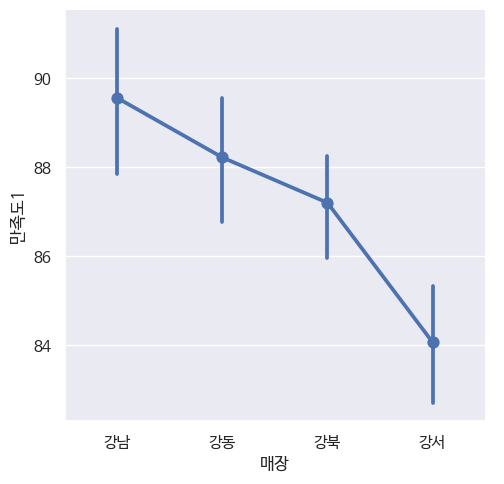

In [18]:
# 그래프
sns.catplot(x = "매장",
            y = "만족도1",
            kind = "point",
            data = owa_df)
plt.show()

## 5.등분산 검정
- 잔차의 등분산성을 검정해야 함
- pg 모형는 잔차가 없어서 statsmodels를 이용해야 함

### 5.1 등분산 검정

In [20]:
# 등분산이면 지금까지 분석한 것이 문제 없음
pg.homoscedasticity(owa_df, dv="만족도1", group="매장")

,W,pval,equal_var
levene,2.190409,0.090459,True


In [22]:
num_feature = ['만족도1', '만족도2']
for num in num_feature:
    print("----", num, "----")
    results = pg.homoscedasticity(owa_df, dv=num, group="매장")
    print(results, "\n")

---- 만족도1 ----
               W      pval  equal_var
levene  2.190409  0.090459       True 

---- 만족도2 ----
               W      pval  equal_var
levene  3.208796  0.024184      False 



### 5.2 이분산일때(Welch's test)

#### 5.2.1 ANOVA(Welch's test)

In [23]:
pg.homoscedasticity(owa_df, dv="만족도2", group="매장")

,W,pval,equal_var
levene,3.208796,0.024184,False


In [24]:
# Welch's test
pg.welch_anova(dv = '만족도2',
               between = '매장',
               data = owa_df).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,매장,3,107.959,2.058,0.11,0.03


#### 5.2.2 이분산 사후분석(post-hoc, Multicom)

In [25]:
# 이분산 post-hoc test
pg.pairwise_gameshowell(data = owa_df,
                        dv = '만족도2',
                        between = '매장').round(3)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,강동,강서,88.22,88.06,0.16,1.018,0.157,96.547,0.999,0.031
1,강동,강남,88.22,89.56,-1.34,1.101,-1.217,97.851,0.617,-0.242
2,강동,강북,88.22,87.14,1.08,0.950,1.136,90.421,0.668,0.226
3,강서,강남,88.06,89.56,-1.50,1.041,-1.440,95.527,0.478,-0.286
4,강서,강북,88.06,87.14,0.92,0.881,1.044,95.153,0.724,0.207
5,강남,강북,89.56,87.14,2.42,0.975,2.482,88.647,0.070,0.493


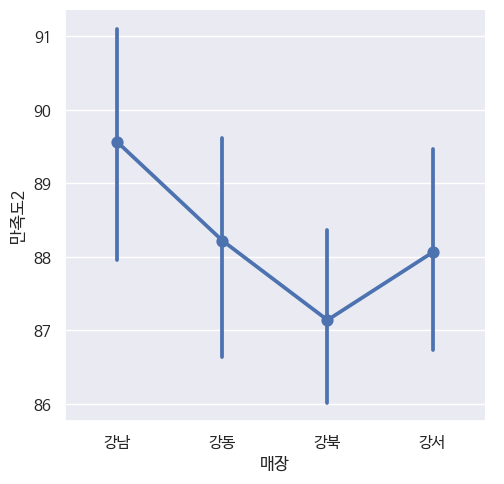

In [26]:
# 그래프
sns.catplot(x = "매장",
            y = "만족도2",
            kind = "point",
            data = owa_df)
plt.show()

## 6.정규성 검정
- 잔차의 정규성을 검정해야 함
- pg 모형는 잔차가 없어서 statsmodels를 이용해야 함

### 6.1 정규분포 검정



In [27]:
# 잔차의 정규성을 검정한 결과 잔차는 정규분포로 나타남
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('만족도1 ~ C(매장)', data = owa_df)
result = model.fit()
pg.normality(result.resid).round(3)

,W,pval,normal
0,0.99,0.208,True


In [28]:
# 잔차의 정규성을 검정한 결과 잔차는 정규분포로 나타남
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('만족도2 ~ C(매장)', data = owa_df)
result = model.fit()
pg.normality(result.resid).round(3)

,W,pval,normal
0,0.992,0.357,True
